# Deepak Kumar Suman

In [61]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from IPython.display import Image  
from sklearn.tree import export_graphviz
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [62]:
maindf=pd.read_csv(r"C:\Users\Dell\Desktop\Learnbay\Learnbay\9 june\Machine Learning\bank.csv")

In [63]:
maindf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [64]:
maindf.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [65]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [66]:
maindf["poutcome"].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [67]:
len(maindf)

11162

In [68]:
maindf["poutcome"].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [69]:
numeri_column=maindf.select_dtypes(include=["int64"]).columns

In [70]:
numeri_column

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

 for i in numeri_column:
        plt.subplots(figsize=(12,7))
        plt.boxplot(maindf[i])
        plt.xlabel(i)

 for i in numeri_column:
        plt.subplots(figsize=(12,7))
        sns.distplot(maindf[i])
        plt.xlabel(i)

In [71]:
maindf=maindf.replace("unknown",None)

In [72]:
maindf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,None,5,may,1042,1,-1,0,None,yes
1,56,admin.,married,secondary,no,45,no,no,None,5,may,1467,1,-1,0,None,yes
2,41,technician,married,secondary,no,1270,yes,no,None,5,may,1389,1,-1,0,None,yes
3,55,services,married,secondary,no,2476,yes,no,None,5,may,579,1,-1,0,None,yes
4,54,admin.,married,tertiary,no,184,no,no,None,5,may,673,2,-1,0,None,yes


In [73]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11092 non-null  object
 2   marital    11162 non-null  object
 3   education  10665 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    8816 non-null   object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   2836 non-null   object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [74]:
print(f"%age missing data in the columns:{((maindf.isna().sum())/len(maindf))*100}")

%age missing data in the columns:age           0.000000
job           0.627128
marital       0.000000
education     4.452607
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      21.017739
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     74.592367
deposit       0.000000
dtype: float64


We can delete null values in job column

In [75]:
maindf=maindf.dropna(subset=["job"])

We will have to delete poutcome column as it has 74% of data missing

In [76]:
del maindf["poutcome"]
maindf

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,None,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,None,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,None,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,None,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,None,5,may,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,no
11158,39,services,married,secondary,no,733,no,no,None,16,jun,83,4,-1,0,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,no


For the missing values in rest of the columns we shall employ SimpleImputer to fill the missing values (which were replaced from unknown in the data columns). These columns are categorical, hwnce we need to use MostFrequent (Mode) as strategy for SimpleImputer. or we can do it manually

 For "contact" column 21.017739% of the data is missing. We can fill it with most frequent value

In [77]:
maindf.fillna({"education":maindf["education"].mode}, inplace=True)

In [78]:
maindf.fillna({"contact":maindf["contact"].mode}, inplace=True)

In [79]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11092 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11092 non-null  int64 
 1   job        11092 non-null  object
 2   marital    11092 non-null  object
 3   education  11092 non-null  object
 4   default    11092 non-null  object
 5   balance    11092 non-null  int64 
 6   housing    11092 non-null  object
 7   loan       11092 non-null  object
 8   contact    11092 non-null  object
 9   day        11092 non-null  int64 
 10  month      11092 non-null  object
 11  duration   11092 non-null  int64 
 12  campaign   11092 non-null  int64 
 13  pdays      11092 non-null  int64 
 14  previous   11092 non-null  int64 
 15  deposit    11092 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


In [96]:
#encod_col=maindf.select_dtypes(include=["object"]).columns
encod_col=['job', 'marital', 'education', 'default', 'housing', 'loan', 'month','deposit']

In [97]:
maindf['education']=maindf['education'].astype(str)

In [98]:
from sklearn.preprocessing import LabelEncoder


In [99]:
le = LabelEncoder()
for i in encod_col:
    maindf[i]= le.fit_transform(maindf[i])
   

In [102]:
maindf.

<class 'pandas.core.frame.DataFrame'>
Index: 11092 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11092 non-null  int64 
 1   job        11092 non-null  int64 
 2   marital    11092 non-null  int64 
 3   education  11092 non-null  int32 
 4   default    11092 non-null  int64 
 5   balance    11092 non-null  int64 
 6   housing    11092 non-null  int64 
 7   loan       11092 non-null  int64 
 8   contact    11092 non-null  object
 9   day        11092 non-null  int64 
 10  month      11092 non-null  int64 
 11  duration   11092 non-null  int64 
 12  campaign   11092 non-null  int64 
 13  pdays      11092 non-null  int64 
 14  previous   11092 non-null  int64 
 15  deposit    11092 non-null  int64 
dtypes: int32(1), int64(14), object(1)
memory usage: 1.4+ MB


In [105]:
maindf["contacts"]=maindf["contact"].astype(str)

RecursionError: maximum recursion depth exceeded

In [38]:
encoded_df=preprocessor(encodedf)

x=encoded_df.drop(["deposit"],axis=1).values
y=encoded_df["deposit"].values

In [17]:
x_train, x_test,y_train, y_test=train_test_split(x, y,test_size=0.2)

In [18]:
m1=DecisionTreeClassifier(random_state=1,max_depth=2)
m1.fit(x_train, y_train)
m1_score_train=m1.score(x_train,y_train)
print(f"Training Score : {m1_score_train}")
m1_score_test=m1.score(x_test, y_test)
print(f"Testing Score: {m1_score_test}")

Training Score : 0.710717885541494
Testing Score: 0.7107030900134348


In [19]:
m2=DecisionTreeClassifier(random_state=1,max_depth=4)
m2.fit(x_train, y_train)
m2_score_train=m2.score(x_train,y_train)
print(f"Training Score : {m2_score_train}")
m2_score_test=m2.score(x_test, y_test)
print(f"Testing Score: {m2_score_test}")

Training Score : 0.795497816104827
Testing Score: 0.7886251679355127


## Gini

In [20]:
maxdepth=[]
trainscore=[]
testscore=[]
for i in range(2,100,2):
    m=DecisionTreeClassifier(random_state=1,max_depth=i)
    maxdepth.append(i)
    m.fit(x_train, y_train)
    m_score_train=m.score(x_train,y_train)
    trainscore.append(m_score_train)
    print(f"Max_depth: {i}")
    print(f"Training Score : {m_score_train}")
    m_score_test=m.score(x_test, y_test)
    testscore.append(m_score_test)
    print(f"Testing Score: {m_score_test}\n")
    

Max_depth: 2
Training Score : 0.710717885541494
Testing Score: 0.7107030900134348

Max_depth: 4
Training Score : 0.795497816104827
Testing Score: 0.7886251679355127

Max_depth: 6
Training Score : 0.8254003807817225
Testing Score: 0.8083296014330497

Max_depth: 8
Training Score : 0.8604546981744876
Testing Score: 0.8145991939095387

Max_depth: 10
Training Score : 0.8936051069548662
Testing Score: 0.8119122257053292

Max_depth: 12
Training Score : 0.9241796393773098
Testing Score: 0.8051948051948052

Max_depth: 14
Training Score : 0.9518423115690446
Testing Score: 0.7957904164800716

Max_depth: 16
Training Score : 0.9702094299473625
Testing Score: 0.7801164352888491

Max_depth: 18
Training Score : 0.984544741852391
Testing Score: 0.7783251231527094

Max_depth: 20
Training Score : 0.9932803225445178
Testing Score: 0.7630989699955217

Max_depth: 22
Training Score : 0.9970881397692911
Testing Score: 0.768025078369906

Max_depth: 24
Training Score : 0.9988800537574196
Testing Score: 0.768920

In [21]:
len(maxdepth)

49

In [22]:
len(trainscore)

49

In [23]:
len(testscore)

49

In [24]:
stt=pd.DataFrame({"maxdepth":maxdepth,"trainscore":trainscore,"testscore":testscore})

In [25]:
stt.head()

,maxdepth,trainscore,testscore
0,2,0.710718,0.710703
1,4,0.795498,0.788625
2,6,0.825400,0.808330
3,8,0.860455,0.814599
4,10,0.893605,0.811912


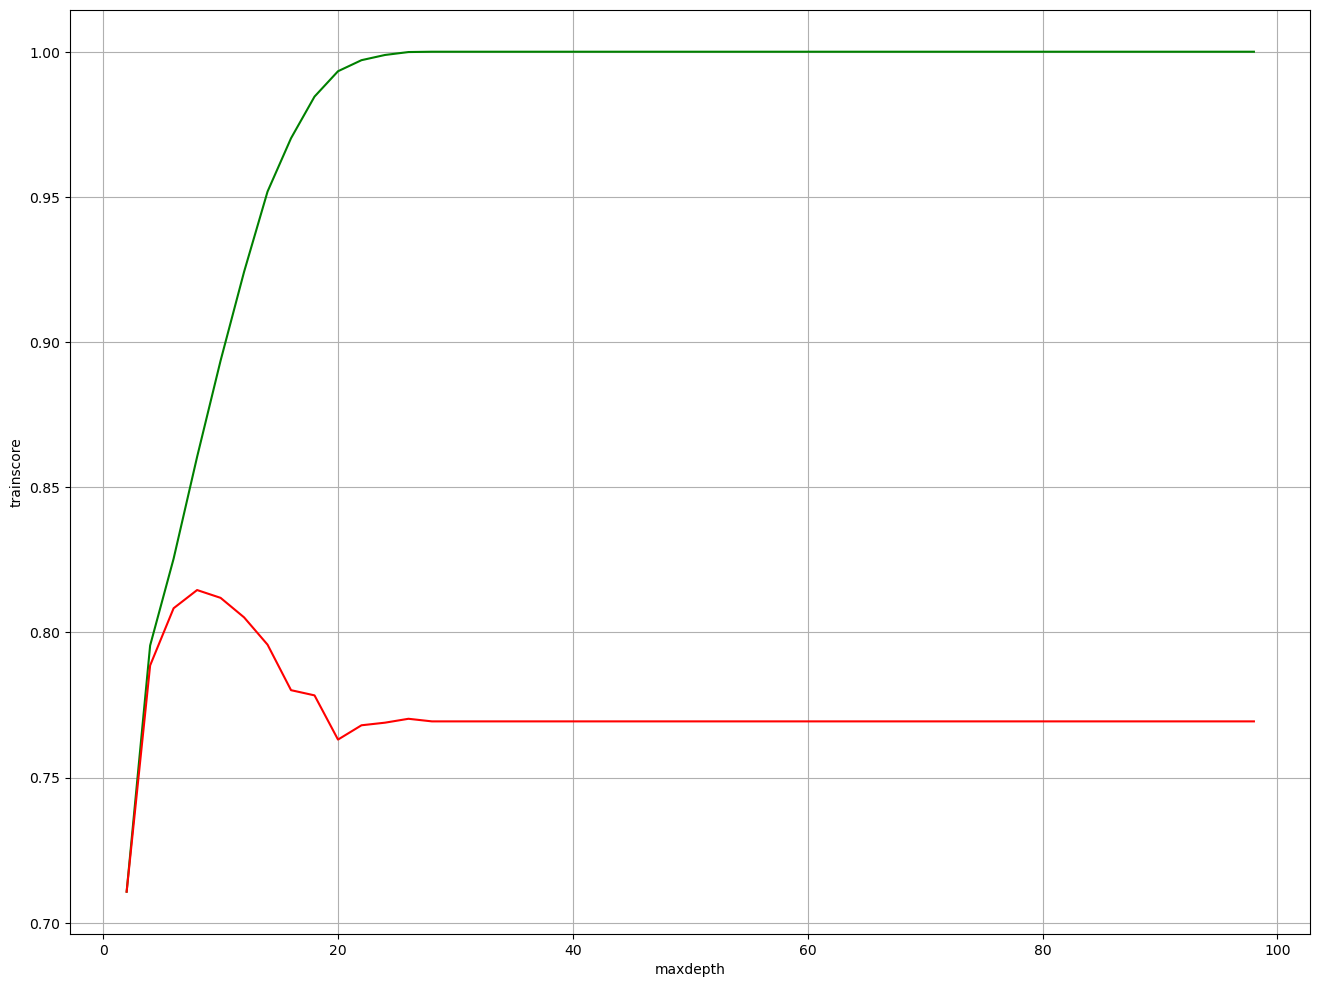

In [26]:
plt.subplots(figsize=(16,12))
sns.lineplot(y=stt["trainscore"],x=stt["maxdepth"],color="g")


sns.lineplot(y=stt["testscore"],x=stt["maxdepth"],color="r")
plt.grid(True)


It can be seen from the graph that the maximum testing accuracy we can get with this data set is  at Max_depth: 8 , where 


Training Score : 0.8579908164408109

Testing Score: 0.7957904164800716

The training and testing accuracy are very close, so no issue of Over-fitting.

## Entropy

In [27]:
maxdepth=[]
trainscore=[]
testscore=[]
for i in range(2,100,2):
    m=DecisionTreeClassifier(random_state=1,max_depth=i,criterion="entropy")
    maxdepth.append(i)
    m.fit(x_train, y_train)
    m_score_train=m.score(x_train,y_train)
    trainscore.append(m_score_train)
    print(f"Max_depth: {i}")
    print(f"Training Score : {m_score_train}")
    m_score_test=m.score(x_test, y_test)
    testscore.append(m_score_test)
    print(f"Testing Score: {m_score_test}\n")

Max_depth: 2
Training Score : 0.7097099339231717
Testing Score: 0.7066726377071205

Max_depth: 4
Training Score : 0.7657072460521895
Testing Score: 0.754590237348858

Max_depth: 6
Training Score : 0.8124090043677904
Testing Score: 0.799820868786386

Max_depth: 8
Training Score : 0.8539590099675216
Testing Score: 0.8217644424540976

Max_depth: 10
Training Score : 0.8878933811177063
Testing Score: 0.8150470219435737

Max_depth: 12
Training Score : 0.9204838167767947
Testing Score: 0.8105687416032243

Max_depth: 14
Training Score : 0.9483704782170456
Testing Score: 0.7926556202418271

Max_depth: 16
Training Score : 0.9670735804681375
Testing Score: 0.7877295118674429

Max_depth: 18
Training Score : 0.9797289730092955
Testing Score: 0.7854903716972682

Max_depth: 20
Training Score : 0.9888005375741964
Testing Score: 0.7836990595611285

Max_depth: 22
Training Score : 0.9927203494232277
Testing Score: 0.774294670846395

Max_depth: 24
Training Score : 0.996864150520775
Testing Score: 0.770264

In [28]:
stt2=pd.DataFrame({"maxdepth":maxdepth,"trainscore":trainscore,"testscore":testscore})

In [29]:
stt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   maxdepth    49 non-null     int64  
 1   trainscore  49 non-null     float64
 2   testscore   49 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


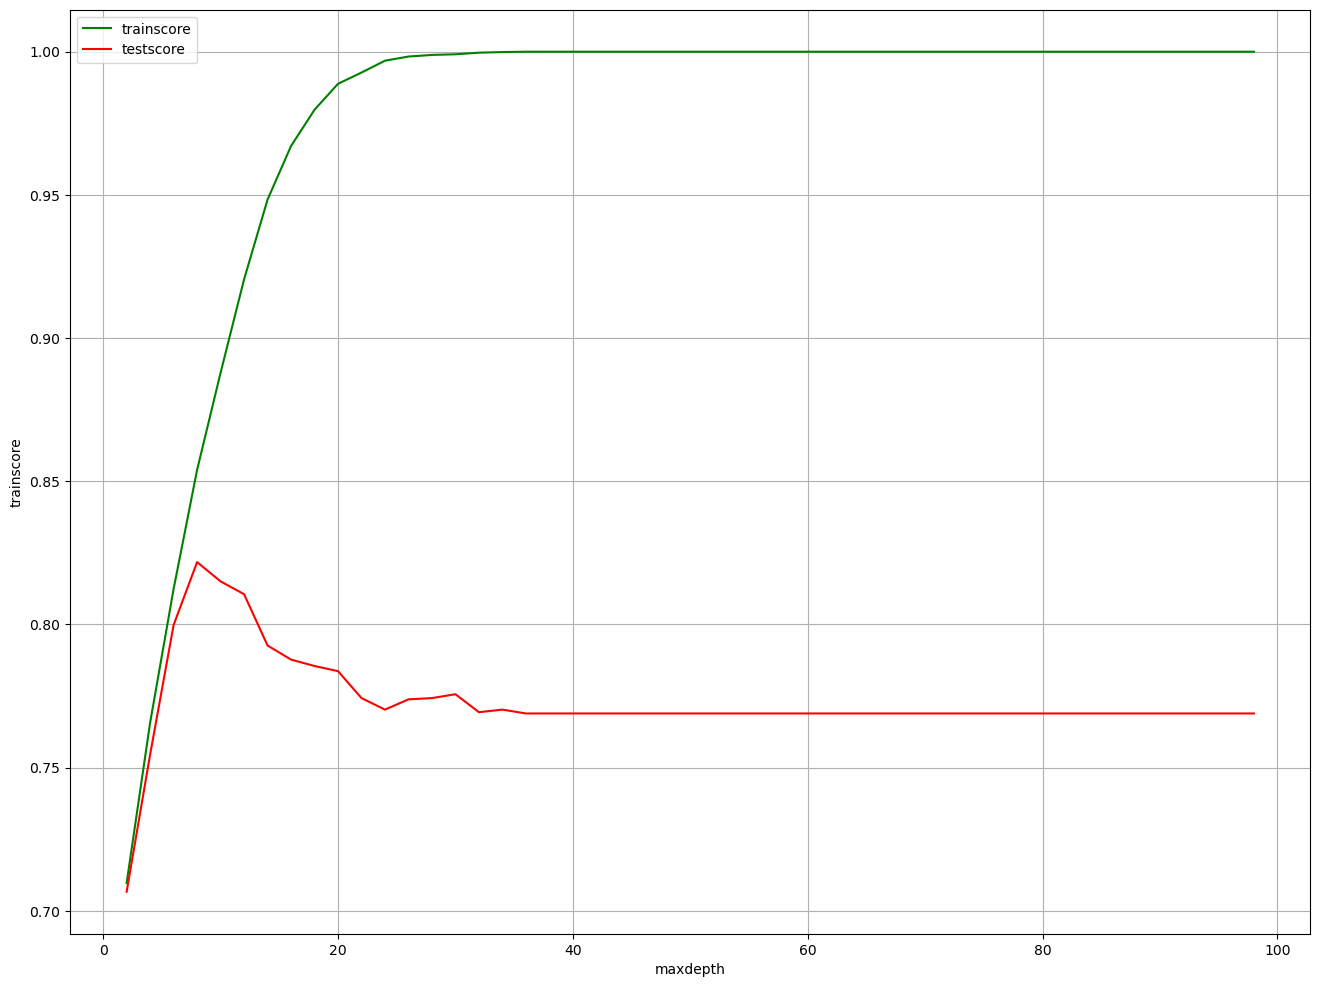

In [30]:
plt.subplots(figsize=(16,12))
sns.lineplot(y=stt2["trainscore"],x=stt2["maxdepth"],label="trainscore", color="g")


sns.lineplot(y=stt2["testscore"],x=stt2["maxdepth"],label="testscore",color="r")
plt.grid(True)


With information gain as criterion, the result is still the same, we get the maximum testing accuracy at max_depth =8.

In [31]:
minsampleleaf=[]
trainscore=[]
testscore=[]
for i in range(10,300,4):
    m=DecisionTreeClassifier(random_state=1,max_depth=8,min_samples_leaf=i)
    minsampleleaf.append(i)
    m.fit(x_train, y_train)
    m_score_train=m.score(x_train,y_train)
    trainscore.append(m_score_train)
    print(f"Max_depth:8, min_sample_leaf: {i}")
    print(f"Training Score : {m_score_train}")
    m_score_test=m.score(x_test, y_test)
    testscore.append(m_score_test)
    print(f"Testing Score: {m_score_test}\n")

Max_depth:8, min_sample_leaf: 10
Training Score : 0.8508231604882965
Testing Score: 0.8141513658755039

Max_depth:8, min_sample_leaf: 14
Training Score : 0.8452234292753947
Testing Score: 0.8226600985221675

Max_depth:8, min_sample_leaf: 18
Training Score : 0.8424235636689439
Testing Score: 0.8154948499776086

Max_depth:8, min_sample_leaf: 22
Training Score : 0.8414156120506215
Testing Score: 0.8141513658755039

Max_depth:8, min_sample_leaf: 26
Training Score : 0.8404076604322992
Testing Score: 0.8137035378414689

Max_depth:8, min_sample_leaf: 30
Training Score : 0.8387277410684287
Testing Score: 0.8141513658755039

Max_depth:8, min_sample_leaf: 34
Training Score : 0.8361518647104939
Testing Score: 0.812360053739364

Max_depth:8, min_sample_leaf: 38
Training Score : 0.8352559077164297
Testing Score: 0.8110165696372593

Max_depth:8, min_sample_leaf: 42
Training Score : 0.8350319184679136
Testing Score: 0.8114643976712942

Max_depth:8, min_sample_leaf: 46
Training Score : 0.8335759883525

In [32]:
stt3=pd.DataFrame({"minsampleleaf":minsampleleaf,"trainscore":trainscore,"testscore":testscore})

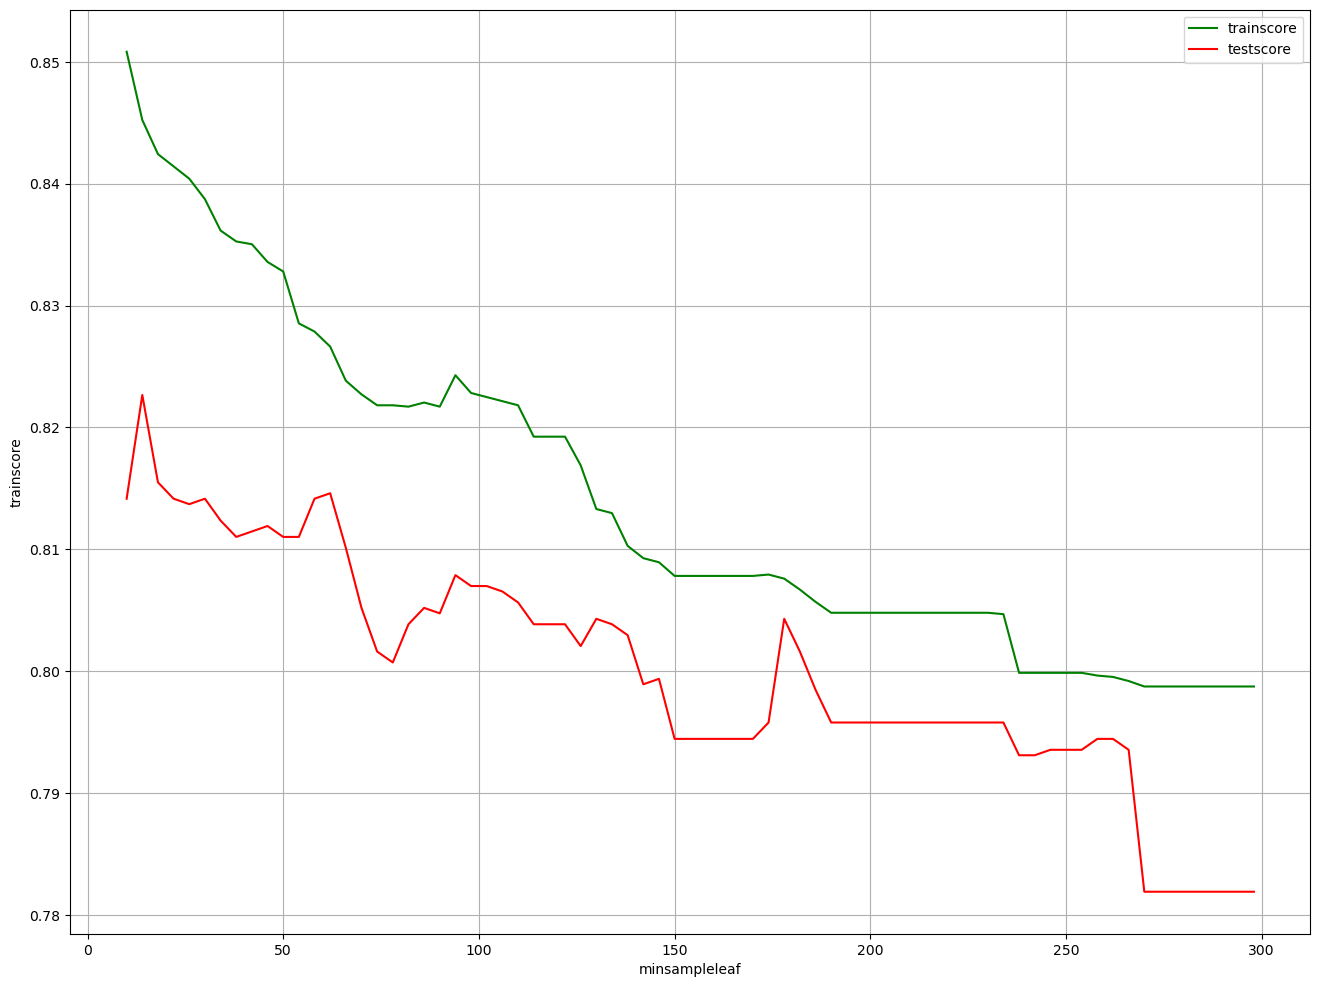

In [33]:
plt.subplots(figsize=(16,12))
sns.lineplot(y=stt3["trainscore"],x=stt3["minsampleleaf"],label="trainscore", color="g")


sns.lineplot(y=stt3["testscore"],x=stt3["minsampleleaf"],label="testscore", color="r")
plt.grid(True)

plt.legend()

The model shows maximum testing efficiency at

Max_depth:8, min_sample_leaf: 34
        
        where 
Training Score : 0.7901220741404412

Testing Score: 0.8034034930586654
    
training and testing accuracy are vey close, so no issue of over-fitting.


In [34]:
minsamplsplit=[]
trainscore=[]
testscore=[]
for i in range(10,1500,5):
    m=DecisionTreeClassifier(random_state=1,max_depth=8,min_samples_leaf=34,min_samples_split=i)
    minsamplsplit.append(i)
    m.fit(x_train, y_train)
    m_score_train=m.score(x_train,y_train)
    trainscore.append(m_score_train)
    print(f"Max_depth:8, min_sample_leaf:34, min_smaples_split: {i}")
    print(f"Training Score : {m_score_train}")
    m_score_test=m.score(x_test, y_test)
    testscore.append(m_score_test)
    print(f"Testing Score: {m_score_test}\n")

Max_depth:8, min_sample_leaf:34, min_smaples_split: 10
Training Score : 0.8361518647104939
Testing Score: 0.812360053739364

Max_depth:8, min_sample_leaf:34, min_smaples_split: 15
Training Score : 0.8361518647104939
Testing Score: 0.812360053739364

Max_depth:8, min_sample_leaf:34, min_smaples_split: 20
Training Score : 0.8361518647104939
Testing Score: 0.812360053739364

Max_depth:8, min_sample_leaf:34, min_smaples_split: 25
Training Score : 0.8361518647104939
Testing Score: 0.812360053739364

Max_depth:8, min_sample_leaf:34, min_smaples_split: 30
Training Score : 0.8361518647104939
Testing Score: 0.812360053739364

Max_depth:8, min_sample_leaf:34, min_smaples_split: 35
Training Score : 0.8361518647104939
Testing Score: 0.812360053739364

Max_depth:8, min_sample_leaf:34, min_smaples_split: 40
Training Score : 0.8361518647104939
Testing Score: 0.812360053739364

Max_depth:8, min_sample_leaf:34, min_smaples_split: 45
Training Score : 0.8361518647104939
Testing Score: 0.812360053739364



Max_depth:8, min_sample_leaf:34, min_smaples_split: 335
Training Score : 0.8168887893381118
Testing Score: 0.8034034930586654

Max_depth:8, min_sample_leaf:34, min_smaples_split: 340
Training Score : 0.8168887893381118
Testing Score: 0.8034034930586654

Max_depth:8, min_sample_leaf:34, min_smaples_split: 345
Training Score : 0.8168887893381118
Testing Score: 0.8034034930586654

Max_depth:8, min_sample_leaf:34, min_smaples_split: 350
Training Score : 0.8168887893381118
Testing Score: 0.8034034930586654

Max_depth:8, min_sample_leaf:34, min_smaples_split: 355
Training Score : 0.8168887893381118
Testing Score: 0.8034034930586654

Max_depth:8, min_sample_leaf:34, min_smaples_split: 360
Training Score : 0.8168887893381118
Testing Score: 0.8034034930586654

Max_depth:8, min_sample_leaf:34, min_smaples_split: 365
Training Score : 0.8168887893381118
Testing Score: 0.8034034930586654

Max_depth:8, min_sample_leaf:34, min_smaples_split: 370
Training Score : 0.814648896852951
Testing Score: 0.796

Max_depth:8, min_sample_leaf:34, min_smaples_split: 675
Training Score : 0.8015455258147609
Testing Score: 0.7863860277653381

Max_depth:8, min_sample_leaf:34, min_smaples_split: 680
Training Score : 0.8015455258147609
Testing Score: 0.7863860277653381

Max_depth:8, min_sample_leaf:34, min_smaples_split: 685
Training Score : 0.8015455258147609
Testing Score: 0.7863860277653381

Max_depth:8, min_sample_leaf:34, min_smaples_split: 690
Training Score : 0.8015455258147609
Testing Score: 0.7863860277653381

Max_depth:8, min_sample_leaf:34, min_smaples_split: 695
Training Score : 0.8015455258147609
Testing Score: 0.7863860277653381

Max_depth:8, min_sample_leaf:34, min_smaples_split: 700
Training Score : 0.8015455258147609
Testing Score: 0.7863860277653381

Max_depth:8, min_sample_leaf:34, min_smaples_split: 705
Training Score : 0.8015455258147609
Testing Score: 0.7863860277653381

Max_depth:8, min_sample_leaf:34, min_smaples_split: 710
Training Score : 0.8015455258147609
Testing Score: 0.78

Max_depth:8, min_sample_leaf:34, min_smaples_split: 1005
Training Score : 0.7770187031022511
Testing Score: 0.7698163905060457

Max_depth:8, min_sample_leaf:34, min_smaples_split: 1010
Training Score : 0.7770187031022511
Testing Score: 0.7698163905060457

Max_depth:8, min_sample_leaf:34, min_smaples_split: 1015
Training Score : 0.7770187031022511
Testing Score: 0.7698163905060457

Max_depth:8, min_sample_leaf:34, min_smaples_split: 1020
Training Score : 0.7770187031022511
Testing Score: 0.7698163905060457

Max_depth:8, min_sample_leaf:34, min_smaples_split: 1025
Training Score : 0.7770187031022511
Testing Score: 0.7698163905060457

Max_depth:8, min_sample_leaf:34, min_smaples_split: 1030
Training Score : 0.7770187031022511
Testing Score: 0.7698163905060457

Max_depth:8, min_sample_leaf:34, min_smaples_split: 1035
Training Score : 0.7770187031022511
Testing Score: 0.7698163905060457

Max_depth:8, min_sample_leaf:34, min_smaples_split: 1040
Training Score : 0.7770187031022511
Testing Sco

Max_depth:8, min_sample_leaf:34, min_smaples_split: 1330
Training Score : 0.7770187031022511
Testing Score: 0.7698163905060457

Max_depth:8, min_sample_leaf:34, min_smaples_split: 1335
Training Score : 0.7770187031022511
Testing Score: 0.7698163905060457

Max_depth:8, min_sample_leaf:34, min_smaples_split: 1340
Training Score : 0.7770187031022511
Testing Score: 0.7698163905060457

Max_depth:8, min_sample_leaf:34, min_smaples_split: 1345
Training Score : 0.7770187031022511
Testing Score: 0.7698163905060457

Max_depth:8, min_sample_leaf:34, min_smaples_split: 1350
Training Score : 0.7770187031022511
Testing Score: 0.7698163905060457

Max_depth:8, min_sample_leaf:34, min_smaples_split: 1355
Training Score : 0.7770187031022511
Testing Score: 0.7698163905060457

Max_depth:8, min_sample_leaf:34, min_smaples_split: 1360
Training Score : 0.7770187031022511
Testing Score: 0.7698163905060457

Max_depth:8, min_sample_leaf:34, min_smaples_split: 1365
Training Score : 0.7770187031022511
Testing Sco

In [35]:
stt4=pd.DataFrame({"minsamplsplit":minsamplsplit,"trainscore":trainscore,"testscore":testscore})

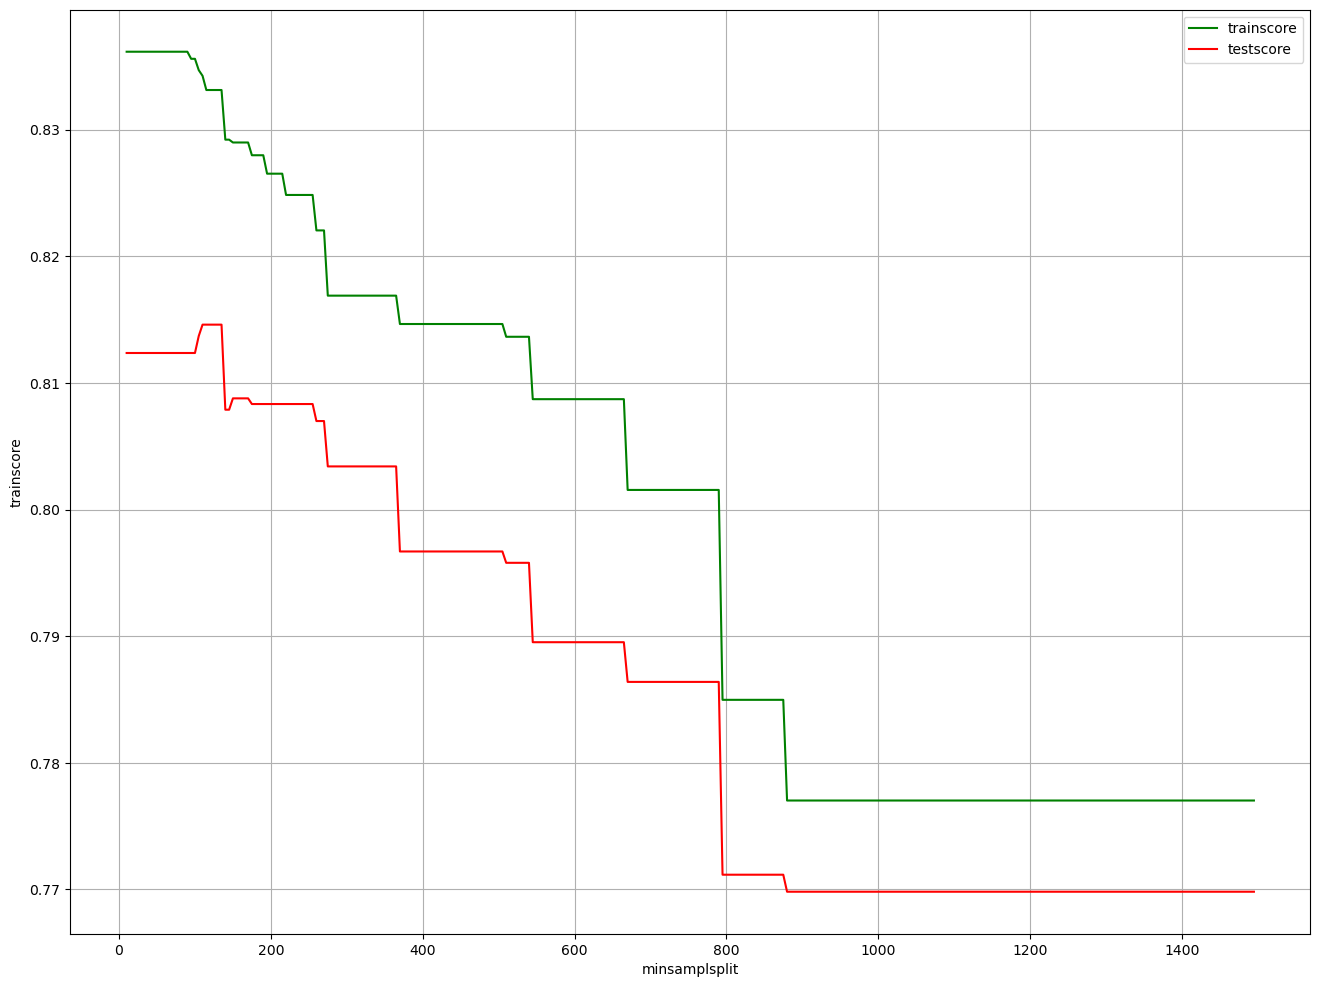

In [36]:
plt.subplots(figsize=(16,12))
sns.lineplot(y=stt4["trainscore"],x=stt4["minsamplsplit"],label="trainscore", color="g")


sns.lineplot(y=stt4["testscore"],x=stt4["minsamplsplit"],label="testscore",color="r")
plt.grid(True)


This Graph doesnot generate any conclusive results, we would need to run much more simulations.

still we got 80% testing accuracy Max_depth:8, min_sample_leaf:34, 

        but we have still not got any optimal combination of hyper parameters
        
        shall be needing further simulation.......................

## Performance matrics

In [37]:
model1=DecisionTreeClassifier(random_state=1,max_depth=8,min_samples_leaf=34)
model1.fit(x_train,y_train)
y_predict_prob=model1.predict_proba(x_test)[:,1] #to get the probability estimates for positive class for a new data point or a set of data points

In [38]:
fpr,tpr,_=roc_curve(y_test,y_predict_prob)
roc_auc=auc(fpr,tpr)

In [39]:
predicted=model1.predict(x_test)


In [40]:
data1=pd.DataFrame({"actual_y":y_test,"predictions":predicted})
data1.head()

,actual_y,predictions
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1


## Recall/tpr/Sensitivity

In [41]:
data1=pd.DataFrame({"actual_y":y_test,"predictions":predicted})
data1.head()

,actual_y,predictions
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1


In [42]:
count1to1=0
for i in range(len(predicted)):
    if (data1["predictions"][i]==1 and data1["actual_y"][i]==1):
        count1to1+=1
        
count1to0=0
for i in range(len(predicted)):
    if (data1["predictions"][i]==0 and data1["actual_y"][i]==1):
        count1to0+=1

print(f"recall:{count1to1/(count1to1+count1to0)}")
    

recall:0.8261700095510984


## Precision/FPR

In [43]:
count0to1=0
for i in range(len(predicted)):
    if (data1["predictions"][i]==1 and data1["actual_y"][i]==0):
        count0to1+=1
        
count0to0=0
for i in range(len(predicted)):
    if (data1["predictions"][i]==0 and data1["actual_y"][i]==0):
        count0to0+=1
print(f"Precision:{count0to1/(count0to1+count0to0)}")
    

Precision:0.19983136593591905


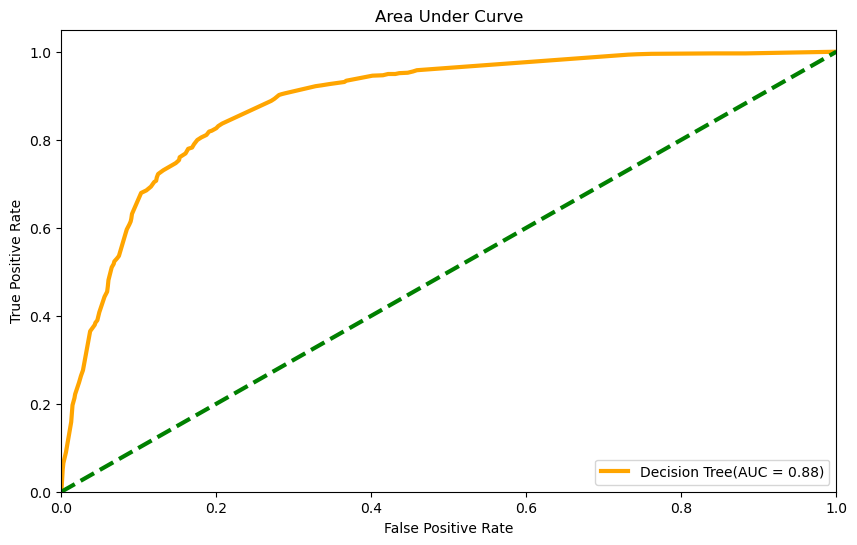

In [44]:
plt.subplots(figsize=(10,6))
sns.lineplot(x=fpr,y=tpr,color="orange",lw=3, label='Decision Tree(AUC = %0.2f)'% roc_auc)
sns.lineplot(x=[0, 1], y=[0, 1], color='green', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [45]:
print(confusion_matrix(y_test,predicted))

[[949 237]
 [182 865]]


In [46]:
accuracy_score(y_test,predicted )

0.812360053739364

In [47]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

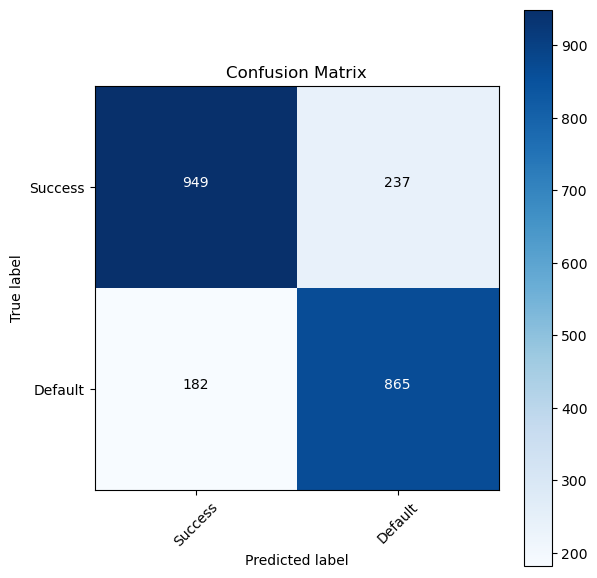

In [48]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predicted, normalize=False)
plt.show()

In [57]:
dtc=DecisionTreeClassifier(random_state=45)

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV


In [59]:
np.random.seed(42)


param_dist = {'max_depth':range(1,50,4),
              "min_samples_split": range(1,100,10),
              "min_samples_leaf": range(1,100,5),
              'criterion': ['gini']
             }

cv_rf = GridSearchCV(dtc, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2600 fits failed out of a total of 26000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Dell\anaconda3\Lib\site-package

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 26, 'min_samples_split': 91}


Best Parameters using grid search are: 

 {'criterion': 'gini', 
 
 'max_depth': 17,
 
 'min_samples_leaf': 26,
 
 'min_samples_split': 91}, 
 
 and rest parameters as default.

In [64]:
Fmodel=DecisionTreeClassifier(random_state=1,max_depth=17,min_samples_leaf=26,min_samples_split=91,criterion="gini")

Fmodel.fit(x_train, y_train)
m_score_train=Fmodel.score(x_train,y_train)
print(f"Training Score : {m_score_train}")
m_score_test=Fmodel.score(x_test, y_test)
testscore.append(m_score_test)
print(f"Testing Score: {m_score_test}\n")

Training Score : 0.8455594131481688
Testing Score: 0.8177339901477833



we got an accuracy of 81% from our final model